# DBSCAN

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
plt.style.use('ggplot')

## Datos

In [3]:
from crea_tabla import *

In [4]:
datos_1, originales = obtén_tabla_datos(conjuntos=30, escala=0.2)

Leyendo numpy...
Organizando renglones...
Creando tabla de datos...
Terminado


In [5]:
c_eliminadas = ["f"]
datos_1.drop(c_eliminadas, axis = 1, inplace = True)

In [6]:
datos_1.head()

,i,j,B,G,R,H,S,V
0,0.0,0.0,112.0,198.0,178.0,37.0,111.0,198.0
1,0.0,1.0,114.0,198.0,178.0,37.0,108.0,198.0
2,0.0,2.0,113.0,202.0,181.0,37.0,112.0,202.0
3,0.0,3.0,111.0,203.0,179.0,38.0,116.0,203.0
4,0.0,4.0,111.0,203.0,179.0,38.0,116.0,203.0


### Visualización en 2D

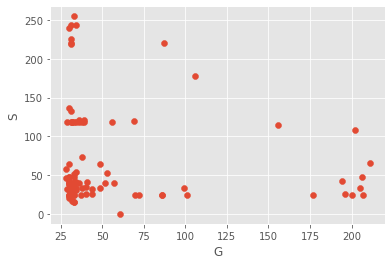

In [7]:
# Sólo dos componentes
# Hay demasiados datos, tomamos una muestra
x = datos_1['G'].sample(100)  # Tienen la varianza más alta
y = datos_1['S'].sample(100)

plt.scatter(x,y)
plt.xlabel("G")
plt.ylabel("S")
plt.show()

### Normalización

In [8]:
# Como arreglo de numpy
muestrea = False
if muestrea:
    num_muestras = 1000
    datos_muestra = datos_1.sample(num_muestras)
    datos = datos_muestra
else:
    datos = datos_1
stscaler = StandardScaler().fit(datos)
np_datos_escalados = stscaler.transform(datos)

In [9]:
# Obtén estadísticas de los datos escalados
df_datos_escalados = pd.DataFrame(np_datos_escalados)
df_datos_escalados.describe()

,0,1,2,3,4,5,6,7
count,4.934400e+04,4.934400e+04,4.934400e+04,4.934400e+04,4.934400e+04,4.934400e+04,4.934400e+04,4.934400e+04
mean,-2.879956e-17,-5.183921e-18,2.030369e-17,2.332764e-17,8.582269e-17,-1.488937e-16,2.563161e-17,1.727974e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.723053e+00,-1.725324e+00,-1.458961e+00,-6.607079e-01,-1.170612e+00,-1.342857e+00,-1.031949e+00,-5.797447e-01
25%,-8.615265e-01,-8.626622e-01,-3.851676e-01,-4.694047e-01,-5.064104e-01,-4.050378e-01,-5.952155e-01,-5.052782e-01
50%,0.000000e+00,0.000000e+00,-3.453975e-01,-4.502744e-01,-4.849846e-01,-1.196147e-01,-4.379914e-01,-4.866615e-01
75%,8.615265e-01,8.626622e-01,-1.863169e-01,-2.207105e-01,-2.707260e-01,4.348430e-02,5.115015e-02,-2.446454e-01
max,1.723053e+00,1.725324e+00,5.182651e+00,3.624484e+00,4.292982e+00,5.955822e+00,3.422733e+00,3.664846e+00


In [10]:
len(df_datos_escalados)

49344

## Modelo DBSCAN

In [11]:
import time as time

In [18]:
# Cuidado: si epsilon es grande y min ejemplares es pequeño la complejidad
# pasa de O(n) a O(n^2)
# Epsilon = 0.5
# Número mínimo de ejemplares en la vecindad = 1% de num_muestras
min_samples = int(len(df_datos_escalados) * 0.01)
t_ini = time.time()
dbsc = DBSCAN(eps = .5, min_samples = min_samples).fit(np_datos_escalados)
print(f"Tiempo transcurrido: {time.time() - t_ini:.3f}s")

Tiempo transcurrido: 7.151s


In [19]:
# Ruido es -1
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [22]:
print("Etiqueta más grande:" ,labels.max())

Etiqueta más grande: 3


## Resultados

In [20]:
rens = originales[0].shape[0]
cols = originales[0].shape[1]
grupos = labels.reshape((rens, cols))

/tmp/ipykernel_7482/1507473639.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


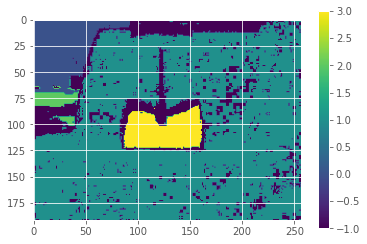

In [23]:
plt.imshow(grupos)
plt.colorbar()